In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [8]:
airports = pd.read_csv(".\\SNAFormative\\data-raw\\airports.csv")
flights = pd.read_csv(".\\SNAFormative\\data-raw\\routes.csv")

In [ ]:
airports

In [10]:
flights

,origin,destination,count
0,ABE,ATL,853
1,ABE,BHM,1
2,ABE,CLE,805
3,ABE,CLT,465
4,ABE,CVG,247
...,...,...,...
5361,YUM,IPL,326
5362,YUM,LAS,99
5363,YUM,LAX,1044
5364,YUM,PHX,1961


In [13]:
origin = flights['origin'].unique()
destination = flights['destination'].unique()
flights_set = set(np.append(origin, destination))
airports_set = set(airports['iata'])
flights_set.issubset(airports_set)

True

In [16]:
val = airports['iata'].to_list()
val
indx = pd.Index(val)
indx

Index(['00M', '00R', '00V', '01G', '01J', '01M', '02A', '02C', '02G', '03D',
       ...
       'Z55', 'Z73', 'Z84', 'Z91', 'Z95', 'ZEF', 'ZER', 'ZPH', 'ZUN', 'ZZV'],
      dtype='object', length=3376)

In [28]:
#flights.insert(1, 'Name Origin', airports.loc[indx.get_indexer(flights['origin']), 'name'].values)
#flights.insert(3, 'Name Destination', airports.loc[indx.get_indexer(flights['destination']), 'name'].values)
flights
flights.to_csv('.\\SNAFormative\\data\\new_flights.csv')

In [29]:
flights

,origin,Name Origin,destination,Name Destination,count
0,ABE,Lehigh Valley International,ATL,William B Hartsfield-Atlanta Intl,853
1,ABE,Lehigh Valley International,BHM,Birmingham International,1
2,ABE,Lehigh Valley International,CLE,Cleveland-Hopkins Intl,805
3,ABE,Lehigh Valley International,CLT,Charlotte/Douglas International,465
4,ABE,Lehigh Valley International,CVG,Cincinnati Northern Kentucky Intl,247
...,...,...,...,...,...
5361,YUM,Yuma MCAS-Yuma International,IPL,Imperial County,326
5362,YUM,Yuma MCAS-Yuma International,LAS,McCarran International,99
5363,YUM,Yuma MCAS-Yuma International,LAX,Los Angeles International,1044
5364,YUM,Yuma MCAS-Yuma International,PHX,Phoenix Sky Harbor International,1961


<h1>Graph using networkx
</h1>

In [33]:
Graph = nx.from_pandas_edgelist(flights, 
                               source='origin',
                               target='destination',
                               edge_attr='count',
                               create_using=nx.Graph())

nx.info(Graph)

'Graph with 305 nodes and 2834 edges'

<h1>Connected Components</h1>

In [34]:
SubGraph = next(Graph.subgraph(Connected) for Connected in nx.connected_components(Graph))

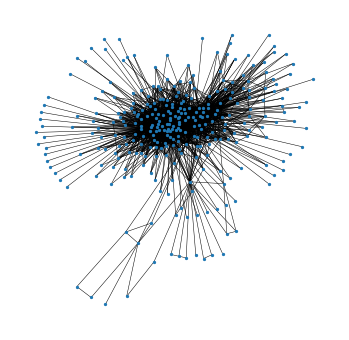

In [38]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
nx.draw_networkx(SubGraph, ax=ax, with_labels=False,
                node_size=5, width=.5)

ax.set_axis_off()

In [39]:
pos = {}

for index, row in airports.iterrows():
    #Check for repeats
    if not row['iata'] in airports:
        pos[row['iata']] = (row['longitude'], row['latitude'])


In [40]:
pos

{'00M': (-89.23450472, 31.95376472),
 '00R': (-95.01792778, 30.68586111),
 '00V': (-104.5698933, 38.94574889),
 '01G': (-78.05208056, 42.74134667),
 '01J': (-81.90594389, 30.6880125),
 '01M': (-88.20111111, 34.49166667),
 '02A': (-86.61145333, 32.85048667),
 '02C': (-88.17786917, 43.08751),
 '02G': (-80.64140639, 40.67331278),
 '03D': (-92.22696056, 40.44725889),
 '04M': (-89.34285194, 33.93011222),
 '04Y': (-96.35089861, 46.88384889),
 '05C': (-87.40109333, 41.51961917),
 '05F': (-97.79696778, 31.42127556),
 '05U': (-116.0050597, 39.60416667),
 '06A': (-85.68003611, 32.46047167),
 '06C': (-88.10124278, 41.98934083),
 '06D': (-99.62087694, 48.88434111),
 '06M': (-89.31256917, 33.53456583),
 '06N': (-74.39191722, 41.43156583),
 '06U': (-114.6580911, 41.97602222),
 '07C': (-85.06433333, 41.30716667),
 '07F': (-94.97174556, 32.52883861),
 '07G': (-84.81143139, 42.57450861),
 '07K': (-98.05033639, 41.11668056),
 '08A': (-86.32822139, 32.52943944),
 '08D': (-102.4063514, 48.30079861),
 '08K

In [42]:
deg = nx.degree(SubGraph)
sizes = [5 * deg[iata] for iata in SubGraph.nodes]

In [43]:
deg

DegreeView({'ABE': 12, 'ATL': 173, 'BHM': 35, 'CLE': 76, 'CLT': 84, 'CVG': 113, 'DTW': 119, 'JFK': 72, 'LGA': 67, 'ORD': 150, 'PHL': 63, 'ABI': 2, 'DFW': 134, 'ABQ': 41, 'AMA': 8, 'AUS': 55, 'BWI': 67, 'DAL': 18, 'DEN': 127, 'ELP': 18, 'EWR': 93, 'HOU': 34, 'IAD': 71, 'IAH': 114, 'LAS': 91, 'LAX': 91, 'LBB': 8, 'MAF': 7, 'MCI': 54, 'MCO': 90, 'MDW': 54, 'MSP': 127, 'OAK': 34, 'OKC': 32, 'ONT': 36, 'PDX': 45, 'PHX': 88, 'SAN': 55, 'SAT': 44, 'SEA': 56, 'SFO': 74, 'SLC': 115, 'SMF': 38, 'STL': 53, 'TPA': 63, 'TUL': 33, 'TUS': 33, 'ABY': 1, 'ACK': 3, 'ACT': 1, 'ACV': 6, 'CEC': 2, 'MRY': 14, 'SJC': 31, 'ACY': 3, 'ADK': 1, 'ANC': 29, 'ADQ': 1, 'AEX': 3, 'AGS': 4, 'AKN': 2, 'DLG': 2, 'ALB': 19, 'BOS': 69, 'DCA': 56, 'FLL': 58, 'SBN': 6, 'ALO': 1, 'BET': 1, 'CDV': 2, 'FAI': 6, 'HNL': 24, 'JNU': 7, 'OGG': 18, 'OME': 2, 'OTZ': 2, 'SCC': 3, 'ASE': 11, 'GJT': 15, 'MSN': 22, 'RFD': 5, 'ATW': 14, 'AVL': 7, 'AVP': 10, 'BDL': 36, 'BGR': 8, 'BMI': 6, 'BNA': 51, 'BOI': 22, 'BQK': 1, 'BTR': 10, 'BTV': 1

In [44]:
sizes

[60,
 865,
 175,
 380,
 420,
 565,
 595,
 360,
 335,
 750,
 315,
 10,
 670,
 205,
 40,
 275,
 335,
 90,
 635,
 90,
 465,
 170,
 355,
 570,
 455,
 455,
 40,
 35,
 270,
 450,
 270,
 635,
 170,
 160,
 180,
 225,
 440,
 275,
 220,
 280,
 370,
 575,
 190,
 265,
 315,
 165,
 165,
 5,
 15,
 5,
 30,
 10,
 70,
 155,
 15,
 5,
 145,
 5,
 15,
 20,
 10,
 10,
 95,
 345,
 280,
 290,
 30,
 5,
 5,
 10,
 30,
 120,
 35,
 90,
 10,
 10,
 15,
 55,
 75,
 110,
 25,
 70,
 35,
 50,
 180,
 40,
 30,
 255,
 110,
 5,
 50,
 70,
 110,
 55,
 50,
 70,
 35,
 15,
 90,
 60,
 195,
 140,
 20,
 45,
 5,
 45,
 85,
 5,
 135,
 65,
 35,
 5,
 10,
 10,
 35,
 5,
 60,
 60,
 15,
 30,
 5,
 35,
 90,
 15,
 100,
 95,
 65,
 5,
 25,
 55,
 5,
 70,
 75,
 105,
 25,
 205,
 45,
 45,
 65,
 210,
 10,
 80,
 15,
 105,
 5,
 5,
 5,
 70,
 5,
 395,
 15,
 30,
 90,
 245,
 275,
 10,
 50,
 15,
 25,
 215,
 40,
 55,
 10,
 155,
 155,
 140,
 20,
 30,
 50,
 190,
 45,
 110,
 65,
 230,
 110,
 125,
 40,
 90,
 180,
 90,
 15,
 150,
 70,
 30,
 115,
 130,
 80,
 60,
 25

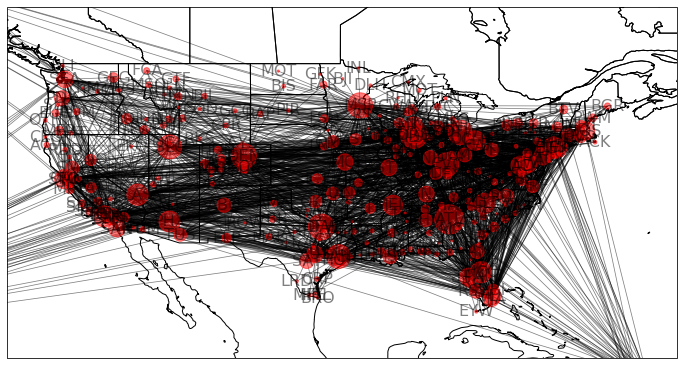

In [50]:
#Mp Projection 

crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
1, 1, figsize=(12,8),
subplot_kw=dict(projection=crs))
ax.coastlines()

ax.set_extent([-128, -62,20,50])
ax.add_feature(cfeature.STATES)

nx.draw_networkx(SubGraph,
                ax=ax,
                font_size=16,
                alpha=.5,
                width=.75,
                node_size=sizes,
                #labels=labels,
                pos=pos,
                node_color='red',
                 cmap=plt.cm.autumn)

In [51]:
fig.savefig('US-Flights.png')